In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
csv_data="C:/datascience/data2.csv"
df=pd.read_csv(csv_data)
df.set_index("id",inplace=True)
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
id,,,,,,,,,,,,,,,,,,,
0,97,123,9,0.000000,0.0,1.555555,1.096294,13.222221,108.740740,52.814816,48.000000,64.111115,46.333332,-14.444445,33.888890,-19.444445,64.111115,0.280593,-1.994105
1,37,189,9,0.000000,0.0,1.388889,1.485184,5.722223,23.885176,30.000000,27.111110,36.333336,26.555555,-8.666667,19.000000,-10.333333,36.333336,0.265248,-2.050282
2,148,169,9,0.111111,0.0,1.055555,0.774073,1.833333,2.611110,19.592592,15.111111,18.666668,25.000000,-13.444445,-2.777778,16.222221,25.000000,0.396121,2.467752
3,95,57,9,0.000000,0.0,1.833333,3.411111,2.111111,1.718517,26.296297,24.666666,34.444447,19.777779,-4.888889,24.444445,-19.555555,34.444447,0.425691,-1.739017
4,200,189,9,0.000000,0.0,1.111111,1.088662,3.166667,1.005541,49.666668,45.111110,60.888890,43.000000,-13.666667,33.666668,-20.000000,60.888890,0.293810,-1.973221


In [3]:
pca=PCA(n_components=2)
pca.fit(df[1:])
df_pca=pca.transform(df)
df_pca[:5]

array([[ 35.27044852, -25.50132464],
       [-48.53526094, -78.5812451 ],
       [-57.86715044,  30.17817051],
       [  1.66587531, -36.18639418],
       [ 11.54906356,  78.82273376]])

In [4]:
print(df.shape)
print(df_pca.shape)

(2100, 19)
(2100, 2)


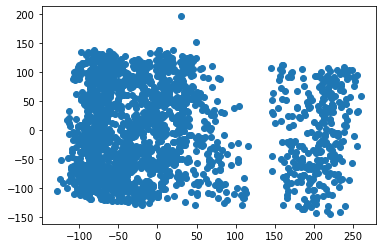

In [5]:
plt.scatter(df_pca[:,0],df_pca[:,1])

In [6]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

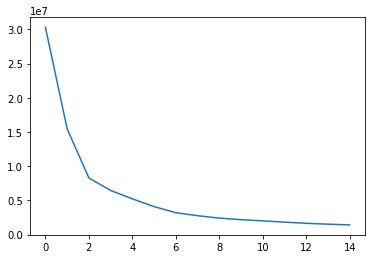

In [7]:
sse=calculate_WSS(df_pca,15)
plt.plot(sse)

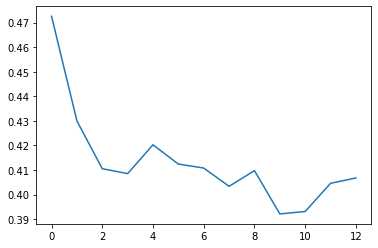

In [8]:
sil=[]
kmax=15
for k in range(3,kmax+1):
    kmeans=KMeans(n_clusters=k).fit(df_pca)
    labels=kmeans.labels_
    sil.append(silhouette_score(df_pca,labels,metric='euclidean'))
plt.plot(sil)

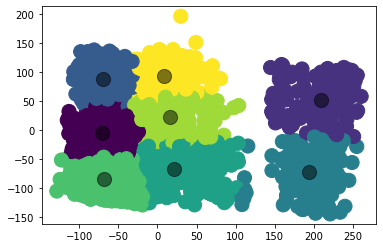

In [9]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(df_pca)
y=kmeans.predict(df_pca)
plt.scatter(df_pca[:,0],df_pca[:,1],c=y,s=200,cmap='viridis')
center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='black',s=200,alpha=0.5)

In [10]:
y.shape

(2100,)

In [26]:
test=pd.read_csv("C:/datascience/test2.csv")
ans=np.zeros(shape=(400,2))
for i in test['index']:
    tar1=test.at[i,'0']
    tar2=test.at[i,'1']
    if y[tar1]==y[tar2]:
        a=[1]
        np.append(ans,[i,1])
    else:
        a=[0]
        np.append(ans,[i,0])

In [33]:
y[tar1]

2